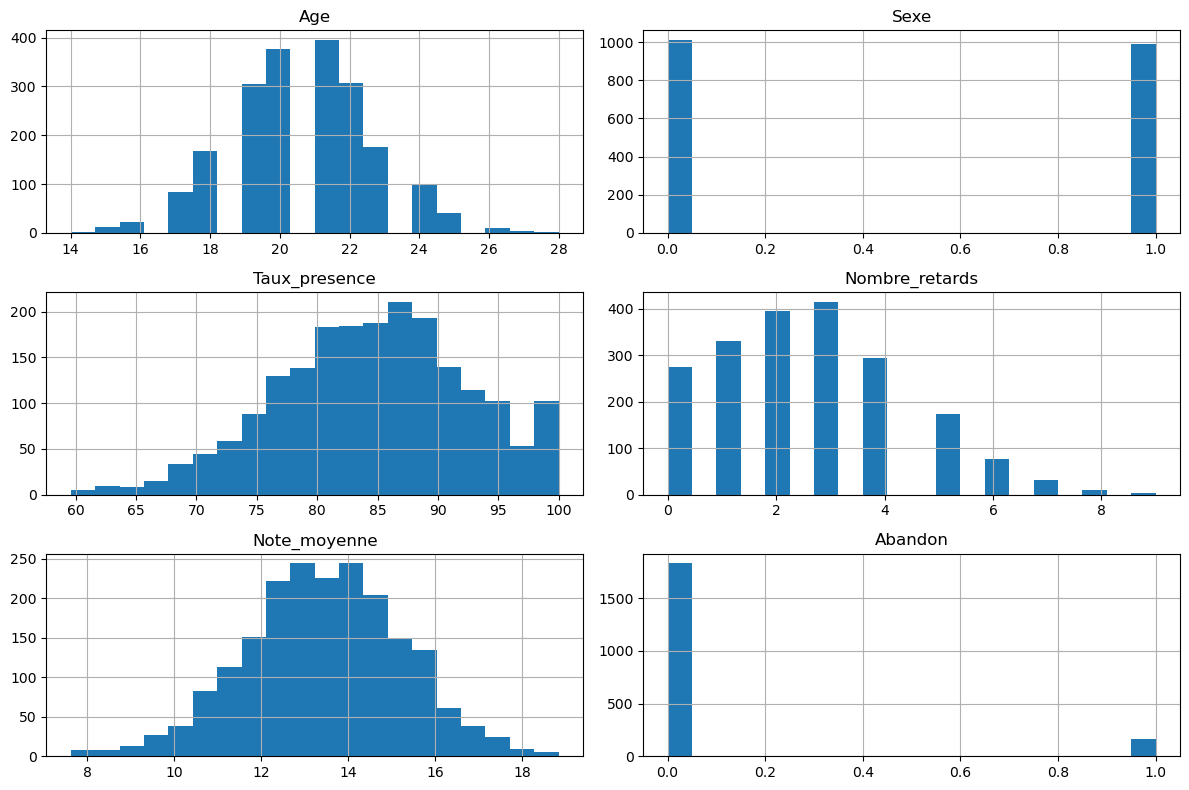

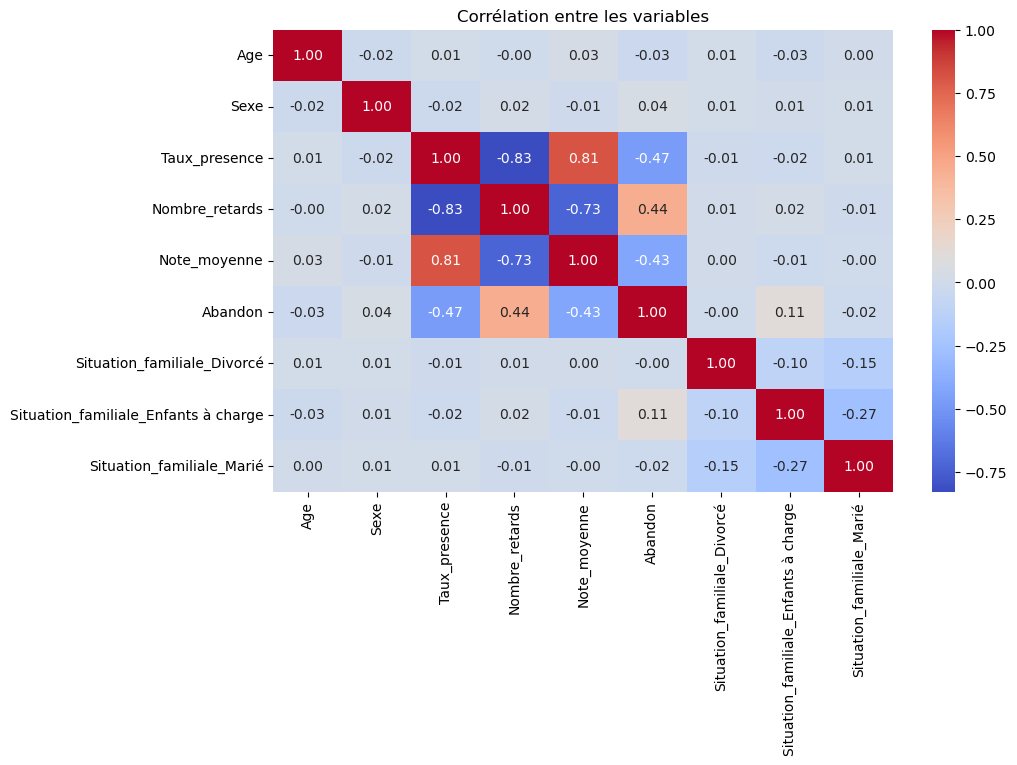

===== KNN =====
[[365   5]
 [ 14  16]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       370
           1       0.76      0.53      0.63        30

    accuracy                           0.95       400
   macro avg       0.86      0.76      0.80       400
weighted avg       0.95      0.95      0.95       400

===== Arbre de Décision =====
[[362   8]
 [ 11  19]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       370
           1       0.70      0.63      0.67        30

    accuracy                           0.95       400
   macro avg       0.84      0.81      0.82       400
weighted avg       0.95      0.95      0.95       400

===== Régression Logistique =====
[[368   2]
 [ 15  15]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       370
           1       0.88      0.50      0.64        30

    accuracy                     

In [20]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Permet d'afficher les graphiques dans le notebook
%matplotlib inline

# Chargement du dataset
df = pd.read_csv("Dataset_Abandon_Scolaire.csv")

# Encodage binaire de la colonne 'Sexe' : Homme → 0, Femme → 1
df["Sexe"] = df["Sexe"].map({"Homme": 0, "Femme": 1})

# Encodage des modalités de la colonne 'Situation_familiale'
df = pd.get_dummies(df, columns=["Situation_familiale"], drop_first=True)

# Affichage des premières lignes pour vérification
df.head()

# Visualisation des distributions des variables numériques
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Matrice de corrélation pour observer les relations entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()

# Séparation des variables explicatives et de la variable cible
X = df.drop("Abandon", axis=1)
y = df["Abandon"]

# Séparation en jeu d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation des modèles de classification
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier(random_state=42)
model_logreg = LogisticRegression(max_iter=1000)

# Entraînement des modèles
model_knn.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)

# Fonction d’évaluation des performances
def evaluer_modele(nom, modele):
    print(f"===== {nom} =====")
    y_pred = modele.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Évaluation des trois modèles
evaluer_modele("KNN", model_knn)
evaluer_modele("Arbre de Décision", model_tree)
evaluer_modele("Régression Logistique", model_logreg)

In [18]:
from sklearn.model_selection import cross_val_score

# Cross-validation pour chaque modèle
scores_knn = cross_val_score(model_knn, X, y, cv=5, scoring='f1')
scores_tree = cross_val_score(model_tree, X, y, cv=5, scoring='f1')
scores_logreg = cross_val_score(model_logreg, X, y, cv=5, scoring='f1')

# Affichage des résultats
print("KNN - F1-score moyen :", scores_knn.mean())
print("Arbre de Décision - F1-score moyen :", scores_tree.mean())
print("Régression Logistique - F1-score moyen :", scores_logreg.mean())


KNN - F1-score moyen : 0.5843252755395018
Arbre de Décision - F1-score moyen : 0.5663305620475365
Régression Logistique - F1-score moyen : 0.5711640211640211


In [21]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres pour KNN
param_grid_knn = {'n_neighbors': list(range(1, 20))}

# GridSearch avec validation croisée
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X, y)

# Meilleurs paramètres et score
print("Meilleur K :", grid_knn.best_params_)
print("Meilleur score F1 :", grid_knn.best_score_)


Meilleur K : {'n_neighbors': 11}
Meilleur score F1 : 0.6353680927174536


In [22]:
param_grid_tree = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='f1')
grid_tree.fit(X, y)

print("Meilleurs paramètres arbre :", grid_tree.best_params_)
print("Meilleur score F1 :", grid_tree.best_score_)


Meilleurs paramètres arbre : {'max_depth': 3, 'min_samples_split': 5}
Meilleur score F1 : 0.6650981119248478
